De relaciones lineales a Computer *Visión*

En el ejercicio anterior vimos como nuestra red pudo aprender fácilmente la relación existente entre los datos de entrada y de salida. A continuación veremos qué ocurre cuando estas relaciones son más complejas, como la clasificación de imágenes. ¿Seríamos capaces de determinar las reglas que permitieran conocer a partir de una imagen si se trata de una camiseta o de un perro? A priori las reglas no parecen tan sencillas como en el caso anterior.

In [1]:
import tensorflow as tf

In [2]:
#mnist de moda
#cargar el dataset

mnist=tf.keras.datasets.fashion_mnist

In [3]:
#leer los datos, cargar
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
#sanity check
#Vamos a ver que tenemos en train_images y en train_labels

import numpy as np
import matplotlib.pyplot as plt


print (train_labels[0])

9


In [7]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

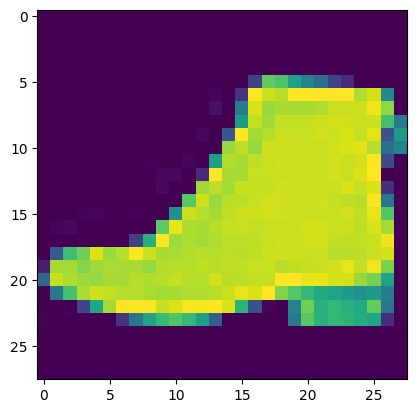

In [8]:
plt.imshow(train_images[7000])

In [9]:
# Dado que nuestra red funciona mejor entre 0 y 1
#Vamos a normalizar
train_images = train_images/255
test_images = test_images/255

In [10]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

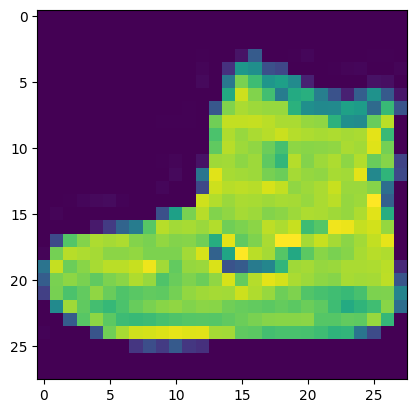

In [11]:
plt.imshow(train_images[0])

In [12]:
# Vamos a construir nuestro lego
#ojo!!! Cosas que vamos a aprender
# Se lo vamos a aplanar
#OJO!!! En la última capa siempre el nº de neuronas que quiero clasificar
#Softmax => Siempre para clsificación en la última capa.
#Representa probabilidades

model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(10, activation="softmax")


])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Ok, ya tenemos nuestros datos
# Ok, ya tenemos nuestra red
#¿Qué nos falta?

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4900 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3705 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8910


In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3449 - accuracy: 0.8741


[0.3448582887649536, 0.8741000294685364]

In [17]:
#Ejercicio 1
# Vamos a ver las probabilidades de que pertenezca a una clase o a otra
clasificaciones=model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


In [18]:
conDecimales = clasificaciones[68]
np.set_printoptions(precision=12, suppress=True)

print(conDecimales)

[0.0002941706  0.00001762386 0.00015503846 0.0019957055  0.00012619112
 0.015556423   0.0010505298  0.9491819     0.0046348185  0.026987603  ]


In [19]:
test_labels[68]

9

In [20]:
# Ejercicio 2
#Veamos ahora con las capas en su modelo.
#Vamos a experimentar con diferentes valores para la capa densa
#con 512 neuronas.
#¿Qué resultados diferentes obtenemos para la function loss, el tiempo de entrenamiento, etc.?
# ¿Por qué crees que es así?

¿Puedo eliminar la capa Flatten?

¿Puedes poner otra capa intermedia? ¿Mejora mucho?

Prueba  a NO normalizar los datos



In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.6):
      print("La precision ha alcanzado el 60%, se cancela el entrenamiento")
      self.model.stop_training = True

callbacks = myCallback()



In [22]:
# Cargamos los conjuntos de datos de entrenamiento y de test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Construimos el modelo
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.7729 - accuracy: 0.7328


Chicos,

mirad la libreta 3 que hay. el código que hay al final.

Una vez entendido, intentad hacer la libreta 4

vengo en cero coma

